In [5]:
!pip install kagglehub # Downloading package for connecting with kaggle


100%|██████████| 5.68k/5.68k [00:00<00:00, 7.04MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/atharvasoundankar/impact-of-ai-on-digital-media-2020-2025/versions/1


In [14]:
# importing libraries for data reading, preprocessing and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# importig packages for dataset reading
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/impact-of-ai-on-digital-media-2020-2025")

# Files examination in following path
print("Files in dataset folder:")
for f in os.listdir(path):
    print(f)

# Making the full path to exact .csv file with dataset
csv_path = os.path.join(path, "Global_AI_Content_Impact_Dataset.csv")

# Reading .csv file and representation in DataFrame
df = pd.read_csv(csv_path)

df.head(5)

Files in dataset folder:
Global_AI_Content_Impact_Dataset.csv


,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


In [19]:
# Checking dataset parameters: shape, NaN meanings
print(df.shape, '\n')
print(df.isna().any(), '\n')

# Information about dataset (null meaning, objects type)
print(df.info())

(200, 12) 

Country                                       False
Year                                          False
Industry                                      False
AI Adoption Rate (%)                          False
AI-Generated Content Volume (TBs per year)    False
Job Loss Due to AI (%)                        False
Revenue Increase Due to AI (%)                False
Human-AI Collaboration Rate (%)               False
Top AI Tools Used                             False
Regulation Status                             False
Consumer Trust in AI (%)                      False
Market Share of AI Companies (%)              False
dtype: bool 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                 

In [21]:
# Data Preprocessing

# Columns renaming in more acceptable and convenient way
df = df.rename(columns = {'AI Adoption Rate (%)': 'adoption_rate','AI-Generated Content Volume (TBs per year)': 'content_volume', 'Job Loss Due to AI (%)': 'job_loss',
                          'Revenue Increase Due to AI (%)': 'revenue_increase', 'Human-AI Collaboration Rate (%)': 'human_collaboration', 'Top AI Tools Used': 'top_tools',
                          'Regulation Status': 'regulation_status', 'Consumer Trust in AI (%)': 'consumer_trust', 'Market Share of AI Companies (%)': 'market_share',
                          'Country': 'country', 'Year': 'year', 'Industry': 'industry'})

df.head(3)

,country,year,industry,adoption_rate,content_volume,job_loss,revenue_increase,human_collaboration,top_tools,regulation_status,consumer_trust,market_share
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76


In [23]:
print(df.describe()) # Descriptive statistics for each column

              year  adoption_rate  content_volume    job_loss  \
count   200.000000     200.000000       200.00000  200.000000   
mean   2022.315000      54.265850        46.07260   25.788250   
std       1.825496      24.218067        29.16122   13.901105   
min    2020.000000      10.530000         1.04000    0.090000   
25%    2021.000000      33.222500        20.32250   14.995000   
50%    2022.000000      53.310000        44.32000   25.735000   
75%    2024.000000      76.220000        71.62000   37.417500   
max    2025.000000      94.760000        99.06000   49.710000   

       revenue_increase  human_collaboration  consumer_trust  market_share  
count        200.000000           200.000000      200.000000    200.000000  
mean          39.719450            54.102150       59.425150     26.569550  
std           23.829545            19.247079       17.319668     14.023729  
min            0.140000            20.210000       30.120000      1.180000  
25%           17.907500      

На какие вопросы можно сначала поискать ответы:
1. Which industry do you think has seen the most ethical dilemmas with AI-generated content?
2. How would you predict AI’s influence on content credibility by 2030?
3. Can AI truly replace human creativity, or will it always need a human-in-the-loop?

Which industry do you think has seen the most ethical dilemmas with AI-generated content?

<Axes: >

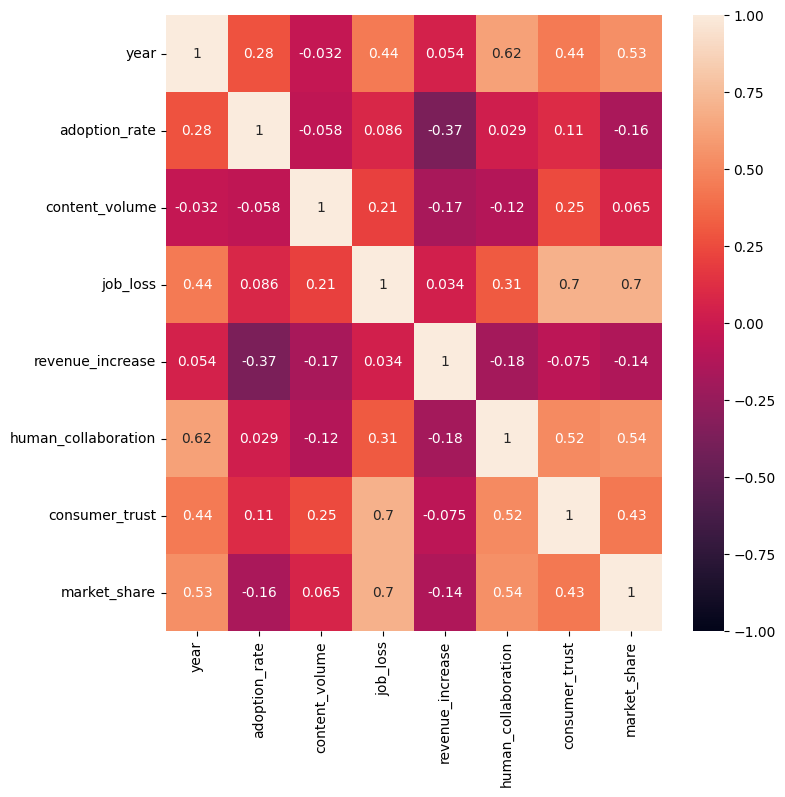

In [12]:
# Estimation the joint distribution of variables using a correlation matrix and heat map
plt.figure(figsize=(8, 8))
sns.heatmap(df[df['industry'] == 'Healthcare'].corr(numeric_only=True), vmax=1, vmin=-1, annot=True)



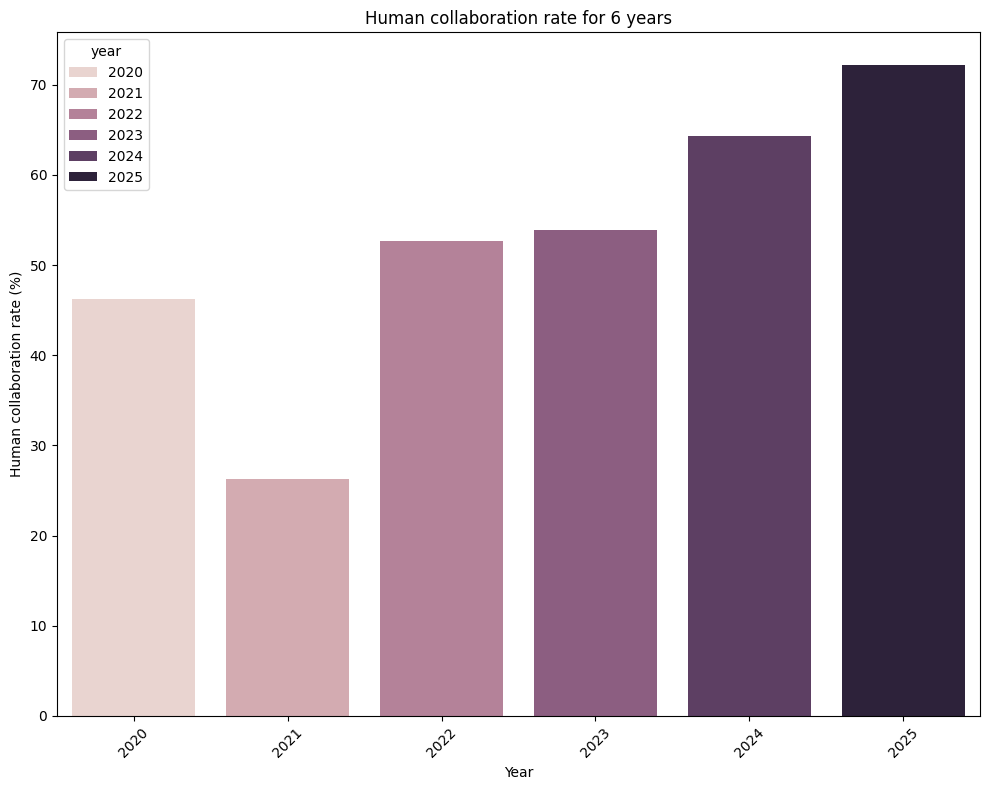

In [25]:
# Human collaboration with AI rate in Healthcare for the last 6 years (2020-2025)
df_health = df[df['industry'] == 'Healthcare']

plt.figure(figsize=(10, 8))

sns.barplot(data=df_health, x='year', y='human_collaboration', hue='year', errorbar=None)
plt.title('Human collaboration rate for 6 years')
plt.xlabel('Year')
plt.ylabel('Human collaboration rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
df_health.shape # Too little datas to create prediction model

(17, 12)

Забавно, что после 23 года медиана по доверию пользователей упала. Проверим, как это происходило в разных странах

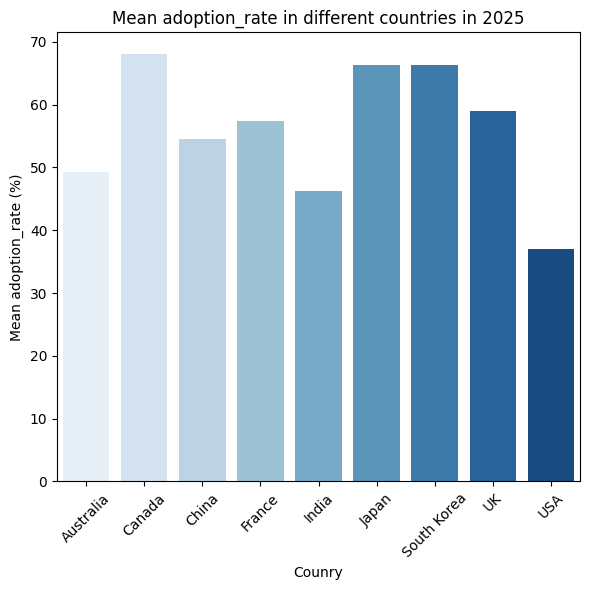

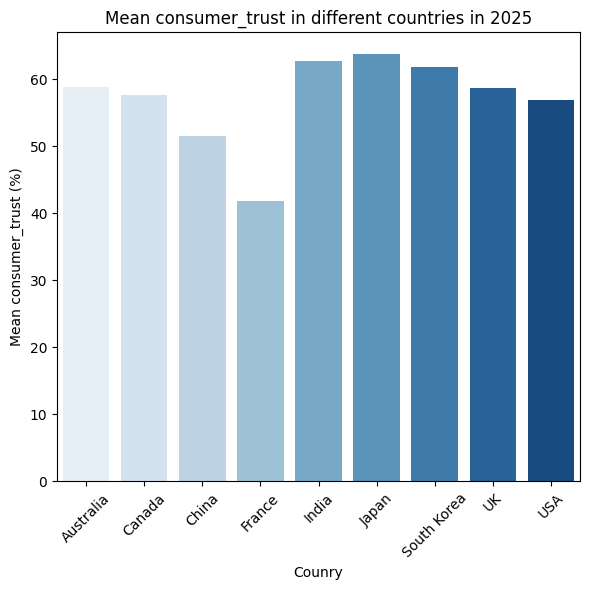

In [ ]:
# Построение столбчатых диаграмм, чтобы узнать среднее значение внедрения ИИ в разных странах и степень доверия потребителя к ИИ продукту
columns = ['adoption_rate', 'consumer_trust']

for col in columns:
  grouped_data = df[df['year'] == 2025].groupby(['country'], as_index=False).aggregate({col: 'mean'})

  plt.figure(figsize=(6, 6))

  sns.barplot(data=grouped_data, x='country', y=col, hue='country', errorbar=None, palette='Blues')
  plt.title(f'Mean {col} in different countries in 2025')
  plt.xlabel('Counry')
  plt.ylabel(f'Mean {col} (%)')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


Видно, что зависимости не наблюдается, для большей наглядности можно построить корреляционную прямую

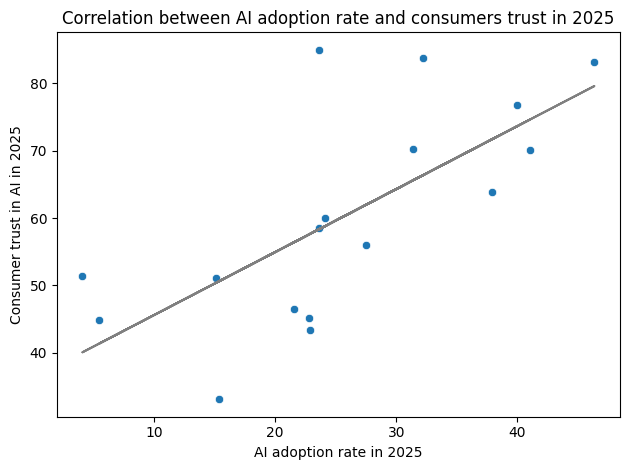

In [22]:
# Построение точечной диаграммы зависимости потери работы и степени доверия пользователей к ИИ в области здравоохранения
from scipy import stats
x, y = df_health.job_loss, df_health.consumer_trust

sns.scatterplot(x=x, y=y)

# Линия тренда (линейная регрессия)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='grey', label=f'Trend line: y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('AI adoption rate in 2025')
plt.ylabel('Consumer trust in AI in 2025')
plt.title('Correlation between AI adoption rate and consumers trust in 2025')

plt.tight_layout()
plt.show()

# Даже нельзя провести анализ с помощью линейной регрессии, данные распределены точно не линейно

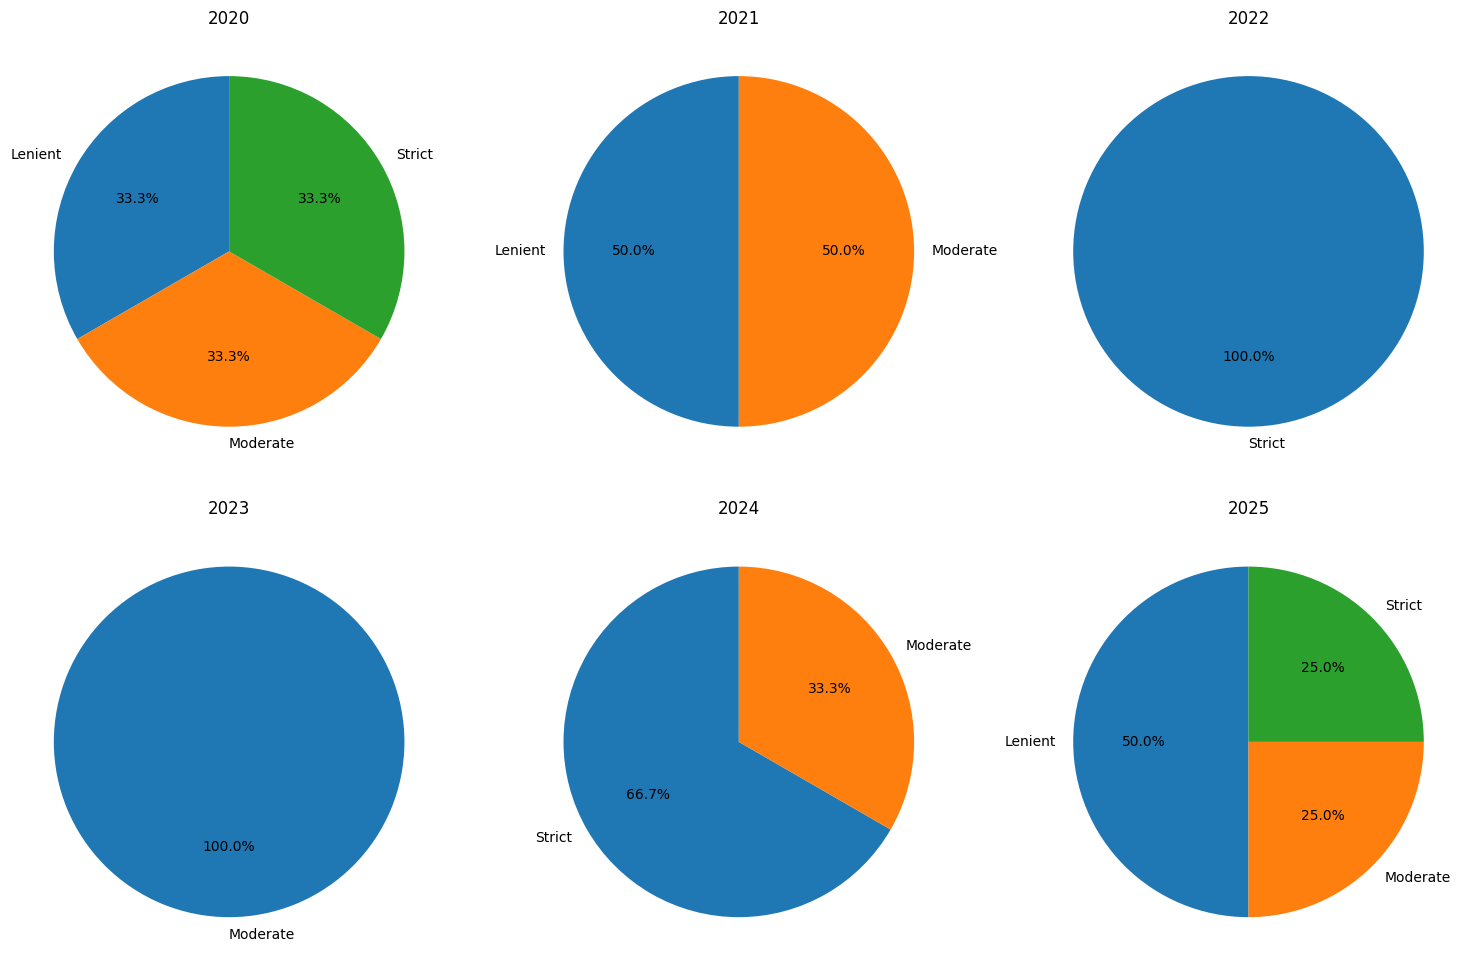

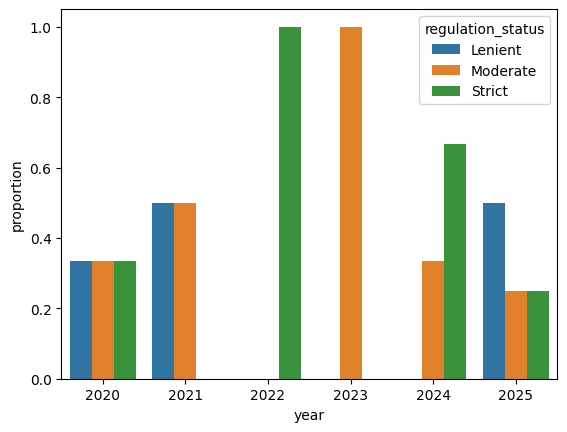

In [17]:
# Оценим изменение государственного контроля ИИ по годам
# Группировка данных по годам и расчет пропорций разных уровней гос регулирования
regulation_status = df_health.groupby('year', as_index=False)['regulation_status'].value_counts(normalize=True)

years = df['year'].unique()

rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i, year in enumerate(sorted(years)):
    data_year = regulation_status[regulation_status['year'] == year]
    axes[i].pie(data_year['proportion'], labels=data_year['regulation_status'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{year}')

plt.tight_layout()
plt.show()

sns.barplot(data=regulation_status, x='year', y='proportion', hue='regulation_status')
plt.show()

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

label_encoders = {}
categorical_cols = ['country', 'top_tools', 'regulation_status', 'industry']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(['regulation_status'], axis=1)
y = df['regulation_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()

clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Метрики регрессии
acc = accuracy_score(y_test, pred)

print(f'acc: {acc:.2f}')

acc: 0.38


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
from sklearn.tree import DecisionTreeClassifier

cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5).mean()

np.float64(0.3375)